In [2]:
# Windtunnel Package Setup
from deploy_config import install_windtunnel, verify_installation

# Install and verify windtunnel package
if not install_windtunnel():
    print("❌ Installation failed. Please check your internet connection.")
else:
    verify_installation()


📦 Installing windtunnel package from GitHub...
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/se04ber/WTSoftwareUtilitiesShare.git to /tmp/pip-req-build-ml0jehur


  Running command git clone --filter=blob:none --quiet https://github.com/se04ber/WTSoftwareUtilitiesShare.git /tmp/pip-req-build-ml0jehur


  Resolved https://github.com/se04ber/WTSoftwareUtilitiesShare.git to commit 5cd4285facb7ceaf2b81f03852c6371dda1f495f
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
✅ windtunnel package installed successfully!
✅ windtunnel package verified and ready to use!


In [3]:
# Data source configuration
USE_GITHUB_EXAMPLE_DATA = True  # Set to False to use local data
#Else use your own Data in Folder Data/(your_data_folder)/measurement_prefix*, ...
DATA_FOLDER_NAME = "your_data_folder"          #name of folder inside Data/InputData/ f.e. Umrechnung zur Kontrolle / 
PARAMETER_FILE_NAME = "ambient_conditions.csv" #name of parameterFile inside ParameterFiles f.e. ambient_conditions_.UBA_GA.csv
MEASUREMENT_PREFIX = "your_measurement_prefix" #Prefix of all time series files inside DATA_FOLDER_NAME f.e. UBA_GA_02_04_01_000_1_001

# Data Setup and Configuration
from deploy_config import setup_folder_structure, setup_github_data, setup_local_data
# Setup folder structure and data
base_dir, data_dir, input_dir, param_dir, results_dir = setup_folder_structure()
if USE_GITHUB_EXAMPLE_DATA:
    path_dir, path, csv_file, output_path, namelist = setup_github_data(input_dir, param_dir, results_dir)
else:
    # Local data configuration
    DATA_FOLDER_NAME = DATA_FOLDER_NAME
    PARAMETER_FILE_NAME = PARAMETER_FILE_NAME 
    MEASUREMENT_PREFIX = MEASUREMENT_PREFIX
    path_dir, path, csv_file, output_path, namelist = setup_local_data(
        input_dir, param_dir, results_dir, DATA_FOLDER_NAME, PARAMETER_FILE_NAME, MEASUREMENT_PREFIX
    )
print(f"✅ Setup complete! Data path: {path}, Output: {output_path}")


📁 Setting up folder structure...
✅ Created directory: /home/jovyan/Data
✅ Created directory: /home/jovyan/Data/InputData
✅ Created directory: /home/jovyan/Data/ParameterFiles
✅ Created directory: /home/jovyan/Results
🌐 Using GitHub example data
📥 Downloading example data from GitHub...
✅ Downloaded: UBA_GA_02_04_01_000_1_001.txt.ts#0
✅ Downloaded: UBA_GA_02_04_01_000_1_001.txt.ts#1
✅ Downloaded: UBA_GA_02_04_01_000_1_001.txt.ts#2
✅ Downloaded: UBA_GA_02_04_01_000_1_001.txt.ts#3
✅ Downloaded: UBA_GA_02_04_01_000_1_001.txt.ts#4
✅ Downloaded: UBA_GA_02_04_01_000_1_001.txt.ts#5
✅ Downloaded: ambient_conditions_.UBA_GA.csv
✅ Example data setup complete!
✅ Setup complete! Data path: /home/jovyan/Data/InputData/Beispiel Umrechnung zur Kontrolle, Output: /home/jovyan/Results/


In [15]:
# Analysis Parameters
# Measurement configuration
parameters_PerFolder = False

# Variables and Parameters set for all ts, if no ambient_conditions.csv file overgiven
# If at the end calculate entdimensionalised or full scale transform quantities
# Default: nd:entdimensionalise, ms:model scale, fs:full scale.    
full_scale='ms'
# Postprocessing before analysis
applyPostprocessing=True
averageInterval=60 # s  # Interval to downaverage raw time series to before analysis
measurementFreq=0.005 # Time series frequency # For now only for static case implemented
averagingColumns=["net_concentration"] # Columns to average dow
# Saving settings: (output_path for path)
osType = "Linux" # Windows  # For Path
outputName = None # Default: ts name

saveTs=True    # Only save time series of concentration quantities to separat files
saveAvg=True # Save average of ts of concentration quantities to separat files
saveStats=True # Save averages, percentile95/5, peak2mean of ts of concentration quantities to separat files
saveCombined=True # Save all averages and statistics for all files to one combined file
combinedFileName="combined_file_nora.csv"
base_path=None # base_path = output_path + "Files/Point_Data_stats/UBA_thesi/" # Base path for getting files for combined files, if None

saveAll=True # Sets saveTs, saveAvg and saveStats, saveCombined to True, saving ts, averages, statistics and combined file

# Uncertainty calculation and saving
calculateUncertainty=True # Calculate measurement uncertainties based on repeated measurements
saveUncertainties=True # Add uncertainty columns to saved files
saveConfigNames=True # Add config_name column to combined files
split_factor=1.8 # Factor for splitting long time series in uncertainty calculation
uncertainty_threshold=1e-4 # Threshold for relative deviation calculation
verboseUncertainty=True # Print detailed logging for uncertainty calculation
uncertaintyMetrics=None # Metrics to calculate uncertainties for: ["Mean", "Median", "Peak2Mean", "P95"] or None for all
uncertaintyConcentrationTypes=None # Concentration types: ["c_star", "net_concentration", "full_scale_concentration"] or None for c_star only
includeAbsoluteUncertainty=True # Include absolute uncertainty values (_uncertainty_abs)
includePercentageUncertainty=True # Include percentage uncertainty values (_uncertainty_pct)

# Column selection for combined files
columnsToSave=None # None=default columns, or provide list e.g. ["Avg_c_star [-]", "X_fs [m]"]

# Legacy uncertainty (for plotting)
uncertainty_value=None # Manual uncertainty value for error bars
uncertainty_representation="percentage" # "absoluteValue"

print("✅ Analysis parameters configured!")


✅ Analysis parameters configured!


In [16]:
#Example file/Default environment values if no csv_file found:

#Source location  [mm]
x_source=0
y_source=0
z_source=0
#Source mass flow controller, calibration settings
mass_flow_controller=0.300 #0.600#Stickstoffdurchflussregler #[l/h]*1/100 #'X'  #Controller(settings) used, just a name placeholder for orientation, not used yet
#If calibration performed on a controller, corrects actual max. flow capacity of controller
calibration_curve=1.0     #0.3     #0.3 oder 3
calibration_factor=0 #1      #
#Gas characteristics
gas_name='C12'           #Just placeholder name variable for orientation, not used for anything
gas_factor=0.5   #[-]    #!!! Needs to be calculate/specificate f.e. if gas changes 
mol_weight=29.0 #28.97 #Air [g/mol]
#Measurement location [mm]
x_measure=1020 #855.16
y_measure= 0    #176.29
z_measure= 5     #162
#Surrounding conditions
pressure=101426.04472        #1009.38  #[hPa] ->Pa
temperature=23             #23.5  #[°C]
#Model to Reality scaling
scale=400                     #250      #Model/Reality
scaling_factor=0.5614882               #0.637       #USA1 to selected ref pos.?
ref_length=1/400              #1/250           #Lref
ref_height=100/400            #None            #Href
#Full Scale Parameters
full_scale_wtref=10             #6         #Uref_fullscale
full_scale_flow_rate=0.002     #Q_amb[kg/s]?   #0.5   #Qv_fullscale
full_scale_temp=20             #[°C]
full_scale_pressure=101325     #[Pa]
#Q_ambient[kg/s] ->  Q[m³/s]=Q[kg/s]*R*T/(M*p)
#Variable wdir for wind direction. To be implemented in future. ##
#wdir=0
#Variable axis_range. Reserved for future implementation of axis range specification, 
#analogously to puff mode
#axis_range='auto'


In [17]:
#Imports
import windtunnel as wt
import os
import sys
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib
import warnings
# Suppress pandas warnings about attribute access (these are just warnings, not errors)
warnings.filterwarnings("ignore", message="Pandas doesn't allow columns to be created via a new attribute name")
from windtunnel.concentration.CompareDatasets import *
# Reload utils module to get latest changes
if 'windtunnel.concentration.utils' in sys.modules:
    importlib.reload(sys.modules['windtunnel.concentration.utils'])
#Edited Nora: Check if ambient conditions file is even there, before trying out reading-in
print(f"CSV erwartet unter: {csv_file}")
if os.path.exists(csv_file):
    print("✅ CSV-Datei gefunden.")
else:
    print("❌ CSV-Datei NICHT gefunden.")
    print("Folgende Dateien sind im Ordner vorhanden:")
    for f in os.listdir(path):
        print(f)

path = path + "/"
#Initialize uncertainty results
uncertainty_results = {}
        
###### Initialise concentration ts dictionary of length namelist, as well as for full scale and entdimensionalised
conc_ts = {}
conc_ts.fromkeys(namelist)
conc_ts_fs = conc_ts
conc_ts_nd = conc_ts

dict_conc_ts = conc_ts
dict_conc_nd = conc_ts
dict_conc_fs = conc_ts

data_dict = {}
data_dict.fromkeys(namelist)

#Read in ambient conditions for each folder or concentration ts from given csv file or for same conditions from manually
parameters_PerFolder = parameters_PerFolder #False  #True=for each folder/namelist entry new column, False: for each ts one column entry

for name in namelist:
    files = wt.get_files(path, name)
    print(f"files: {files}")

    #Initilise Dictionary for each given name containing dimensions of nr of files ts#0-
    conc_ts[name] = {}
    conc_ts[name].fromkeys(files)
    
    if parameters_PerFolder==True:
        #Read ambient conditions from csv file only for each folder
        ambient_conditions = wt.PointConcentration.get_ambient_conditions(path=path, name=name, input_file=csv_file)
        #print(ambient_conditions)
        #Else read/use given default from cell above
        if ambient_conditions is None:
            []
        #Read ambient conditions from csv file
        else:
            x_source, y_source, z_source, x_measure, y_measure, z_measure, pressure, temperature, calibration_curve, mass_flow_controller, calibration_factor, scaling_factor, scale, ref_length, \
            ref_height, gas_name, mol_weight, gas_factor, full_scale_wtref, full_scale_flow_rate, full_scale_temp, full_scale_pressure, config_name = wt.PointConcentration.read_ambient_conditions(
                ambient_conditions, name)
            
        
    for file in files:
        if parameters_PerFolder == False:
            #Read in ambient condition column for each ts
            ambient_conditions = wt.PointConcentration.get_ambient_conditions(path=path, name=file, input_file=csv_file)
            #Else read/use given default from cell above
            if ambient_conditions is None:
                []
            #Read ambient conditions from csv file
            else:
                x_source, y_source, z_source, x_measure, y_measure, z_measure, pressure, temperature, calibration_curve, mass_flow_controller, calibration_factor, scaling_factor, scale, ref_length, \
                ref_height, gas_name, mol_weight, gas_factor, full_scale_wtref, full_scale_flow_rate, full_scale_temp, full_scale_pressure,  config_name= wt.PointConcentration.read_ambient_conditions(
                ambient_conditions, file)

        conc_ts[name][file] = wt.PointConcentration.from_file(path + file)
    
        conc_ts[name][file].ambient_conditions(x_source=x_source, y_source=y_source, z_source=z_source,
                                               x_measure=x_measure, y_measure=y_measure, z_measure=z_measure,
                                               pressure=pressure,
                                               temperature=temperature,
                                               calibration_curve=calibration_curve,
                                               mass_flow_controller=mass_flow_controller,
                                               calibration_factor=calibration_factor,
                                               config_name=config_name)

        #Set read-in scaling, gas and full scale information to internal class variables
        print("Store information into PointConcentration class objects array")
        conc_ts[name][file].scaling_information(scaling_factor=scaling_factor, 
                                                scale=scale,
                                                ref_length=ref_length, 
                                                ref_height=ref_height)
        conc_ts[name][file].tracer_information(gas_name=gas_name,
                                               mol_weight=mol_weight,
                                               gas_factor=gas_factor)
        conc_ts[name][file].full_scale_information(full_scale_wtref=full_scale_wtref,
                                                   full_scale_flow_rate=full_scale_flow_rate,
                                                   full_scale_temp=full_scale_temp,full_scale_pressure=full_scale_pressure)

        #Calculate mass flow rate, net concentration and dimensionalise concentration
        print("Do main calculations")
        conc_ts[name][file].convert_temperature()
        conc_ts[name][file].calc_wtref_mean()
        
        conc_ts[name][file].calc_model_mass_flow_rate(usingMaxFlowRate="True",applyCalibration="False")
        conc_ts[name][file].calc_net_concentration()

        #conc_ts[name][file].clear_zeros()  #Remove values net_concentration =< 0 from dataset !noise
        conc_ts[name][file].calc_c_star()

        conc_ts[name][file].calc_full_scale_concentration() #Try

        #Transforming/Outputting data in full-scale, model scale, and non-dimensional
        print("Transform scale")
        if full_scale == 'ms':
            dict_conc_ts = conc_ts
            
        elif full_scale == 'fs':
            dict_conc_ts = conc_ts_fs
            dict_conc_ts[name][file].to_full_scale()
            
        elif full_scale == 'nd':
            dict_conc_ts = conc_ts_nd
            dict_conc_ts[name][file].to_non_dimensional()
        else:
            print(
                "Error: invalid input for full_scale. Data can only be computed in model scale (full_scale='ms'), full scale (full_scale='fs'), or non-dimensionally (full_scale=nd).")
        #Apply Postprocessing if overgiven
        """
        measurementFreq=measurementFreq #Time series frequency #For now only for static case implemented
        averageInterval=averageInterval #60 #s
        columns=averagingColumns #Columns to average down
        #print(len(dict_conc_ts[name][file].net_concentration))
        if(applyPostprocessing==True):
                print("Apply postprocessing averaging: {averageInterval}s")
                dict_conc_ts[name][file].downAverage(averageInterval=averageInterval,measurementFreq=measurementFreq, columns=columns)
                #dict_conc_ts[name][file].net_concentration
        
        #print(len(dict_conc_ts[name][file].net_concentration))
        """
    
    #Calculate measurement uncertainties before saving combined files
    if calculateUncertainty and saveCombined:
        try:
            from windtunnel.concentration.utils import calculate_uncertainties
            if verboseUncertainty:
                metrics_str = ", ".join(uncertaintyMetrics) if uncertaintyMetrics else "all"
                conc_types_str = ", ".join(uncertaintyConcentrationTypes) if uncertaintyConcentrationTypes else "c_star only"
                print(f"\n📊 Calculating measurement uncertainties for: {metrics_str} ({conc_types_str})")
            for name in namelist:
                try:
                    uncertainty_results.update(calculate_uncertainties(
                        conc_ts[name], 
                        split_factor=split_factor, 
                        uncertainty_threshold=uncertainty_threshold, 
                        verbose=verboseUncertainty,
                        metrics_to_calculate=uncertaintyMetrics,
                        concentration_types=uncertaintyConcentrationTypes,
                        include_abs=includeAbsoluteUncertainty,
                        include_pct=includePercentageUncertainty
                    ))
                except TypeError as e:
                    print(f"⚠️ Error with new parameters: {e}")
                    print("⚠️ Falling back to basic parameters")
                    uncertainty_results.update(calculate_uncertainties(conc_ts[name], split_factor, uncertainty_threshold))
        except ImportError:
            print("⚠️ calculate_uncertainties function not available in this version")
            print("⚠️ Skipping uncertainty calculation - continuing without uncertainties")
            uncertainty_results = None
        except Exception as e:
            print(f"⚠️ Error calculating uncertainties: {e}")
            print("⚠️ Continuing without uncertainties")
            uncertainty_results = None
    
    for name in namelist:
        #Saving PointConcObject calculates new quantities(f.e. c*star) to files
        if(saveAll):
            saveTs=True
            saveAvg=True
            saveStats=True
            saveCombined=True
        if(saveCombined):
            saveAvg=True
            saveStats=True
                    
        if(saveTs==True or saveAvg==True or saveStats==True or saveCombined==True):
            if osType=="Windows":
                folder = 'Point_Data\\' + name[:name.find('.')] + '\\'
                folder_avg = 'Point_Data_avg\\' + name[:name.find('.')] + '\\'
                folder_stats = 'Point_Data_stats\\' + name[:name.find('.')] + '\\'
            elif osType=="Linux":
                 #print("gets here 2")
                 folder = 'Point_Data/' + name[:name.find('.')] + '/'
                 folder_avg = 'Point_Data_avg/' + name[:name.find('.')] + '/'
                 folder_stats = 'Point_Data_stats/' + name[:name.find('.')] + '/'
              
            wt.check_directory(output_path + folder)
            dict_conc_ts[next(iter(conc_ts))][next(iter(conc_ts[next(iter(conc_ts))]))].__check_sum = 8
        #dict_conc_ts[name][file].__check_sum = 8
      
        if(saveTs):
            if full_scale == 'ms':
                dict_conc_ts[name][file].save2file_ms(file, out_dir=output_path + folder)
            elif full_scale == 'fs':
                dict_conc_ts[name][file].save2file_fs(file, out_dir=output_path + folder)
            elif full_scale == 'nd':
                dict_conc_ts[name][file].save2file_nd(file, out_dir=output_path + folder)
            else:
                print(
                    "Error: invalid input for full_scale. Data can only be computed in model scale (full_scale='ms'), full scale (full_scale='fs'), or non-dimensionally (full_scale=nd).")
                exit
            print("Created ts files including (net_concentration, entimendionsliased and full scale concentration)")
        if(saveAvg):
             #Saving averages to files under folder Point_Data_stats/
            #Averages of net_concentration,c_star and full_scale_concentration
             wt.check_directory(output_path + folder_avg)
             dict_conc_ts[name][file].save2file_avg(file, out_dir=output_path + folder_avg)
             print(f"Created avg files under {output_path + folder_avg}")
        if(saveStats):
            #Saving stats to files under folder Point_Data_avg/
            #Stats Full ausgabe: saveAvg Quantities + Percentile 95, percentile 5, peak2Mean of net_concentration_c_star and full_Scale_conc
             wt.check_directory(output_path + folder_stats)
             dict_conc_ts[name][file].save2file_fullStats(file, out_dir=output_path + folder_stats)
             print(f"Created stats files under {output_path + folder_stats}")
            
        if(saveCombined):
            try:
                from windtunnel.concentration.utils import combine_to_csv2
                stats=True
                if(stats):
                    file_type="stats"
                
                file_names = ["_stats_" + file for file in files]
                if(base_path==None):
                    base_path = output_path + f"Point_Data_{file_type}/{name[0:-1]}/"
                
                combine_to_csv2(
                    file_names=file_names,
                    base_path=base_path,
                    file_type=file_type,
                    output_filename=output_path+combinedFileName,
                    conc_ts_dict=conc_ts[name],
                    uncertainty_results=uncertainty_results if calculateUncertainty else None,
                    save_config_names=saveConfigNames,
                    save_uncertainties=saveUncertainties and calculateUncertainty,
                    columns_to_save=columnsToSave
                )
                print(f"✅ Created combined file: {output_path+combinedFileName}")
            except ImportError:
                # Fallback to basic combine_to_csv function
                try:
                    from windtunnel.concentration.utils import combine_to_csv
                    stats=True
                    if(stats):
                        file_type="stats"
                    
                    # The saved files have "_stats_" prefix, so we need to use that
                    file_names = ["_stats_" + file for file in files]
                    if(base_path==None):
                        base_path = output_path + f"Point_Data_{file_type}/{name[0:-1]}/"
                    
                    combine_to_csv(
                        file_names=file_names,
                        base_path=base_path,
                        file_type=file_type,
                        output_filename=output_path+combinedFileName
                    )
                    print(f"✅ Created combined file (basic version): {output_path+combinedFileName}")
                except ImportError:
                    print("⚠️ No combine functions available in this version")
                    print("⚠️ Skipping combined file creation - individual files saved successfully")
            except Exception as e:
                print(f"⚠️ Error creating combined file: {e}")
                print("⚠️ Individual files saved successfully")


CSV erwartet unter: /home/jovyan/Data/ParameterFiles/ambient_conditions_.UBA_GA.csv
✅ CSV-Datei gefunden.
files: ['UBA_GA_02_04_01_000_1_001.txt.ts#0', 'UBA_GA_02_04_01_000_1_001.txt.ts#1', 'UBA_GA_02_04_01_000_1_001.txt.ts#2', 'UBA_GA_02_04_01_000_1_001.txt.ts#3', 'UBA_GA_02_04_01_000_1_001.txt.ts#4', 'UBA_GA_02_04_01_000_1_001.txt.ts#5']
Store information into PointConcentration class objects array
Do main calculations
Transform scale
Store information into PointConcentration class objects array
Do main calculations
Transform scale
Store information into PointConcentration class objects array
Do main calculations
Transform scale
Store information into PointConcentration class objects array
Do main calculations
Transform scale
Store information into PointConcentration class objects array
Do main calculations
Transform scale
Store information into PointConcentration class objects array
Do main calculations
Transform scale
⚠️ calculate_uncertainties function not available in this versio

In [7]:
#Uncertainty calculation is now integrated in Cell 2 and modularized in utils.calculate_uncertainties()
#This cell is no longer needed - uncertainty calculation happens automatically before saveCombined



 File: UBA_GA_02_04_01_000_1_001.txt.ts#0
c_star vorhanden
C_star shape: (30000,)
NaNs vorhanden: False
Min/Max: -0.30316299999999985 / 1202.017763
Mean: 57.8003463437
Std: 57.76664016113261
Percentiles: {10: np.float64(12.215996500000001), 90: np.float64(120.00919130000001), 95: np.float64(161.68999759999997)}

 File: UBA_GA_02_04_01_000_1_001.txt.ts#1
c_star vorhanden
C_star shape: (30000,)
NaNs vorhanden: False
Min/Max: -1.1505290000000001 / 779.15148
Mean: 57.68628691473333
Std: 61.95945048114276
Percentiles: {10: np.float64(9.1554916), 90: np.float64(125.9157658000001), 95: np.float64(173.63429904999998)}

 File: UBA_GA_02_04_01_000_1_001.txt.ts#2
c_star vorhanden
C_star shape: (30000,)
NaNs vorhanden: False
Min/Max: -0.621735 / 795.289011
Mean: 52.02871467456667
Std: 57.61027356225925
Percentiles: {10: np.float64(7.128442400000001), 90: np.float64(116.657799), 95: np.float64(158.66340479999997)}

 File: UBA_GA_02_04_01_000_1_001.txt.ts#3
c_star vorhanden
C_star shape: (30000,)
N

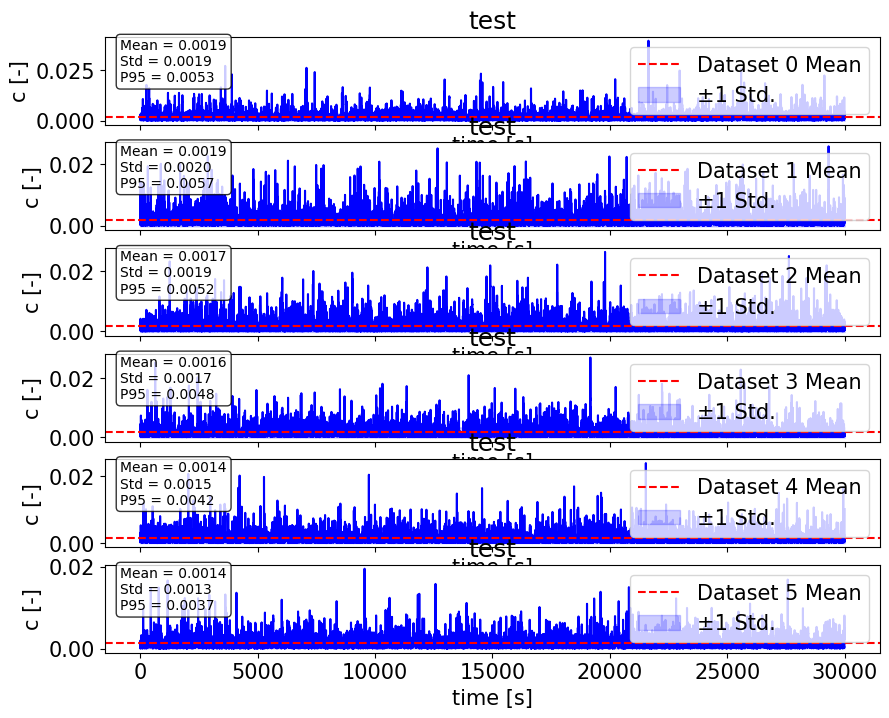

In [8]:
#Test read-in and net_conc and c*star output values, shape, nans and min/max
#Test if net_concentration and c_star there
"""if hasattr(conc_ts[name][file], "c_star"):
    print("c_star vorhanden")
else:
    print("⚠️ Keine c_star Daten gefunden.")

if hasattr(conc_ts[name][file], "concentration"):
    if hasattr(conc_ts[name][file], "net_concentration"):
        setattr(conc_ts[name][file], "concentration", conc_ts[name][file].net_concentration)
    else:
        print("⚠️ Kein concentration oder net_concentration gefunden.")"""

 
#Test numerical value range
for name in namelist:
    for file in files:
        print(f"\n File: {file}")
        if hasattr(conc_ts[name][file], "c_star"):
            print("c_star vorhanden")
        else:
            print("⚠️ Keine c_star Daten gefunden.")

        print("C_star shape:", conc_ts[name][file].net_concentration.shape)
        #print(conc_ts[name][file].net_concentration)
        #plt.plot(conc_ts[namelist[0]][files[0]].c_star)
        print("NaNs vorhanden:", np.any(np.isnan(conc_ts[name][file].net_concentration)))
        print("Min/Max:", np.min(conc_ts[name][file].net_concentration), "/", np.max(conc_ts[name][file].net_concentration))
        print(f"Mean: {np.mean(conc_ts[name][file].net_concentration)}")
        print(f"Std: {np.std(conc_ts[name][file].net_concentration)}")
        print(f"Percentiles: {conc_ts[name][file].calc_percentiles(percentiles=[10, 90, 95], var='net_concentration')}")    
plt.show()
#plt.violinplot([conc_ts[name][file].c_star for file in files])
#plt.show()


#Read-in Data into separat array for later plotting (files/series can also be specifically choosen)
dimensionless=True
color="blue"

DataPointsConc = []
#DataPointsConc = [ conc_ts[namelist[0]]["MyFileofInterest1.txt"], conc_ts[namelist[0]]["MyFileofInterest2.txt"]]
for i in range(len(files)): #Just visualising all
    data = conc_ts[namelist[0]][files[i]]
    DataPointsConc.append(data)
# Richtige Zeitserien laden
labels=[f"Dataset {i}" for i in range(0,len(DataPointsConc))]
plot_timeseries_with_stats(DataPointsConc,dimensionless=dimensionless,labels=labels,color=color)


In [9]:
"""
#full_path = "/Users/norakaiser/Masterthesis/WTSoftwareUtilitiesShare/test_meas/results/Point_Data_avg/UBA_thesis_test_01072025_001/_avg_UBA_thesis_test_01072025_001.ts#0"
full_path = "/Users/norakaiser/Masterthesis/WTSoftwareUtilitiesShare/test_meas/results/Point_Data_avg/UBA_thesis_test_01072025_001/_avg_UBA_thesis_test_01072025_001.ts#0"
base_path = output_path + "Files/Point_Data_avg/UBA_thesi/"
file_names = ["_avg_" + file for file in files]
for file in file_names:
    #metadata = {}
    data = []
    with open(full_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            if line.startswith('"'):
                # Kopfzeile mit Variablennamen
                headers = line.replace('"', '').split()
                continue
            # Wertezeile
            values = list(map(float, line.split()))
            data.append(values)
    
    df = pd.DataFrame(data, columns=headers)
    print(df.head())
"""


'\n#full_path = "/Users/norakaiser/Masterthesis/WTSoftwareUtilitiesShare/test_meas/results/Point_Data_avg/UBA_thesis_test_01072025_001/_avg_UBA_thesis_test_01072025_001.ts#0"\nfull_path = "/Users/norakaiser/Masterthesis/WTSoftwareUtilitiesShare/test_meas/results/Point_Data_avg/UBA_thesis_test_01072025_001/_avg_UBA_thesis_test_01072025_001.ts#0"\nbase_path = output_path + "Files/Point_Data_avg/UBA_thesi/"\nfile_names = ["_avg_" + file for file in files]\nfor file in file_names:\n    #metadata = {}\n    data = []\n    with open(full_path, \'r\') as f:\n        for line in f:\n            line = line.strip()\n            if not line or line.startswith(\'#\'):\n                continue\n            if line.startswith(\'"\'):\n                # Kopfzeile mit Variablennamen\n                headers = line.replace(\'"\', \'\').split()\n                continue\n            # Wertezeile\n            values = list(map(float, line.split()))\n            data.append(values)\n\n    df = pd.DataFra

[np.float64(191.1711425166667), np.float64(46.59676312166666), np.float64(14.19278708866667), np.float64(7.925406690666662), np.float64(0.021087820083330655)]
[np.float64(129.70314641666664), np.float64(31.181590431666663), np.float64(10.847684875000006), np.float64(6.899539998166674), np.float64(1.772200359583337)]
[np.float64(141.5670969333333), np.float64(32.77503943666666), np.float64(9.870075067333325), np.float64(4.920635326166661), np.float64(0.9165446198333242)]
[np.float64(110.15718923333336), np.float64(27.162796098333324), np.float64(7.330642992333345), np.float64(5.694779225000005), np.float64(3.859295252999999)]
[np.float64(79.68427418333333), np.float64(21.704997195000004), np.float64(7.134927745333329), np.float64(4.667101114333327), np.float64(2.873633315083339)]
[np.float64(76.71157831666667), np.float64(19.92285522166666), np.float64(7.927559724666658), np.float64(4.380431845333327), np.float64(0.9446214741666736)]


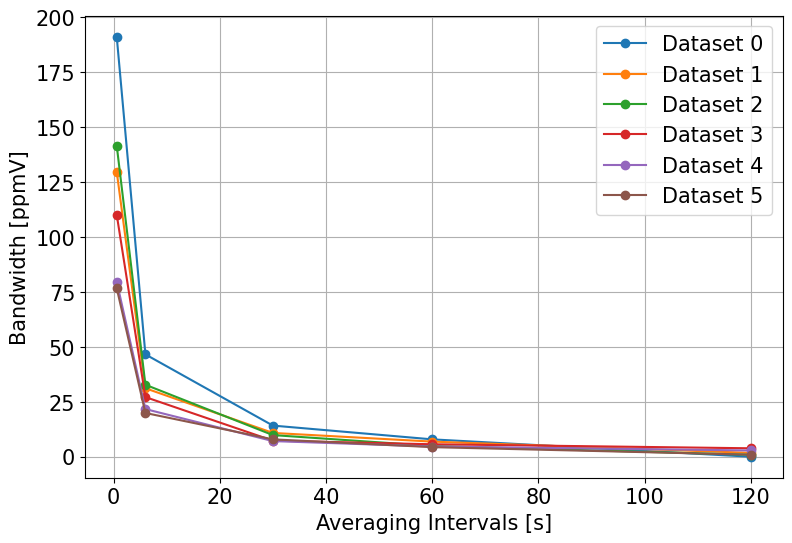

In [10]:
#Bandwidth convergence plot
xLabel = "Time Interval"
yLabel = "Windspeed [m/s]"
Labels = None
dimensionless = True #False
xAchse = None
yAchse = None
error_values = 0.1
marker = 'o'
#colors = ["green",""blue"]
time_freq = 0.010 #s
averaging_intervals = [60*0.01,60*0.1,60*0.5,60*1.0,60*2.0]# [60*0.01,60*0.1,60*0.5, 60*1,60*2,60*3,60*4,60*5]#in s     #Example for [15,30 and 60 min]
#t*[[-] =[s/(m/s) * m]  = t[s] / Uref[m/s] * Lref[m]
#TODO:Bandwidth=True

bandwidths = []
for name in namelist:
    for file in files:
        ts_v_avg = conc_ts[name][file].get_averagedData(name, file, time_freq, averaging_intervals)
        bandwidths.append([np.max(avg) - np.min(avg) for avg in ts_v_avg])  # or use np.ptp(avg)(peakTopeak) for same result, but faster
for i, bandwidth in enumerate(bandwidths):
    print(bandwidth)
    plt.plot(averaging_intervals, bandwidth, "o-", 
             label=f"Dataset {i}" if Labels is None else Labels[i])
plt.xlabel("Averaging Intervals [s]")
plt.ylabel("Bandwidth [ppmV]")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#4x1 Table means, std., peak2mean,percentile 
xLabels = "Datasets"
yLabels = ['Mean  [ppmV]', '95th Percentile  [ppmV]', 'Std Dev.  [ppmV]','Peak/Mean  [-]'] #None #"Concentration"
Labels = None
dimensionless = False
xAchse = Noneambient_conditions_.UBA_GA.csv
yAchse = None
markers = ['o', 's', '^', 'd']
colors = ["green","blue","red","purple"]

error_values = 0.5 #[error_mean,error_95,error_std,error_peak/mean]
percentileValue = 95 #percentil for percentilCalculation 95->95%

# Calculate stats
x = range(len(DataPointsConc))
DataPointsConc2 = [DataPoints.net_concentration for DataPoints in DataPointsConc]
stats = [[np.mean(d),  np.percentile(d, percentileValue), np.std(d),np.max(d)/np.mean(d)] for d in DataPointsConc2]
stats = list(zip(*stats))
errors = error_values if isinstance(error_values, list) else [error_values] * len(DataPointsConc)

fig, axes = plt.subplots(2, 2, figsize=(8, 10))
axes_flat = axes.flatten()  # Convert 2x2 array to 1D array

for i, ax in enumerate(axes_flat):
    ax.errorbar(x, stats[i], yerr=errors, fmt=markers[i], capsize=3, color=colors[i])
    if yAchse: 
        ax.set_ylim(yAchse)
    if xAchse: 
        ax.set_xlim(xAchse)
    if i >= 2:  # Bottom row subplots
        ax.set_xlabel(xLabels)
    ax.set_ylabel(yLabels[i])
    ax.grid(True)   
    ax.set_title(data.config_name)
    # ax.set_xticks(x)
    # ax.set_xticklabels([f'Dataset {j+1}' for j in x])

plt.tight_layout()
if Labels != None:
    plt.legend(Labels)
plt.show()


NameError: name 'Noneambient_conditions_' is not defined

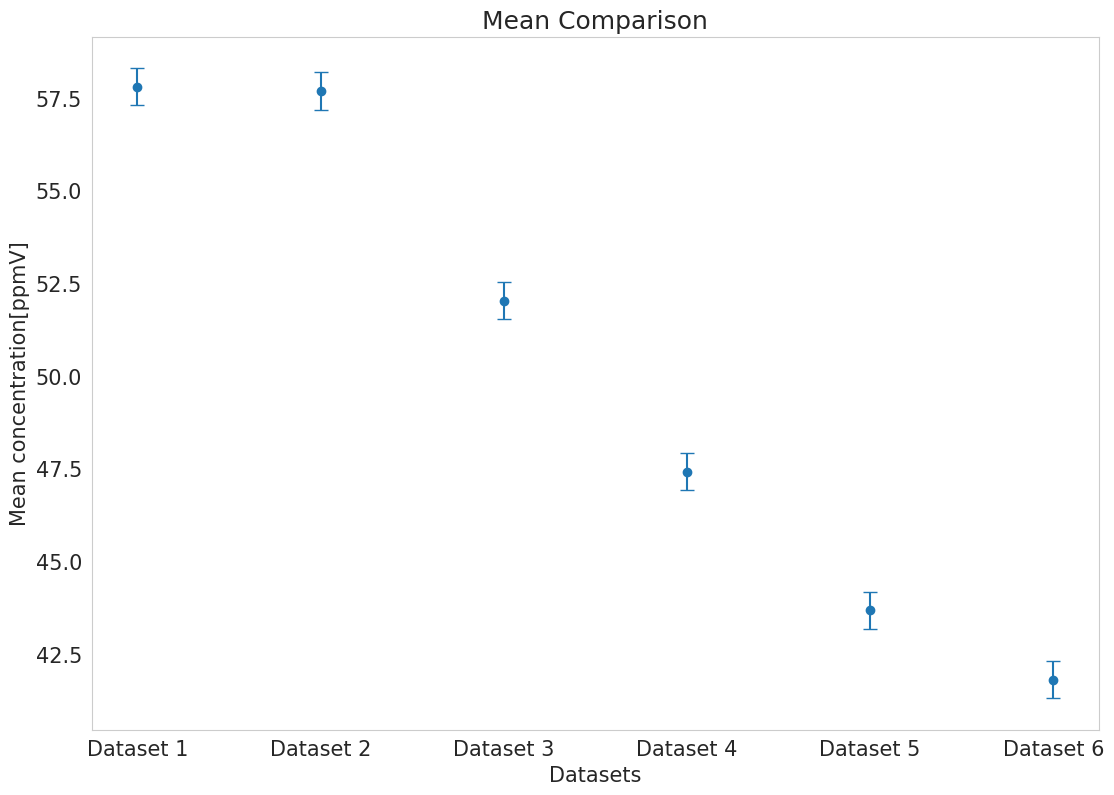

In [12]:
xLabel="Datasets"
yLabel="Mean concentration[ppmV]" 
dimensionless="False"
xAchse = None 
yAchse=None #(72,79) #None 
error_values=0.5 #[0.5,0.2,0.1] #For error values overgive one number which is cast to all values, or an array if specify different errors for each measurements
errorType="absolute"
test = create_means(DataPointsConc,error_values,dimensionless=dimensionless,labels=None,xLabel=xLabel,yLabel=yLabel,xAchse=xAchse,yAchse=yAchse)
#plt.savefig("Mean_comparison.png",test) #To save image


In [ ]:
xLabel="Concentration[-]"
yLabel="Density"
dimensionless="True"
create_pdf(DataPointsConc,dimensionless="True",labels=None,xLabel=xLabel,yLabel=yLabel,xAchse=None,yAchse=None)


In [ ]:
xLabel="Datasets"
yLabel="Concentration [-]"
dimensionless="True"
create_violinplot(DataPointsConc)


In [ ]:
xLabel="Datasets"
yLabel="Concentration [-]"
dimensionless="True"
create_boxplot(DataPointsConc,dimensionless="True",labels=None,xLabel=xLabel,yLabel=yLabel,xAchse=None,yAchse=None)


In [ ]:
xLabel="Datasets"
yLabel="Concentration[ppmV]"
xLabel="Datasets"
yLabel="Concentration[ppmV]"
create_histogram(DataPointsConc,dimensionless="False",labels=None,xLabel=xLabel,yLabel=yLabel,xAchse=None,yAchse=None)


In [ ]:
yLabel=None
xLabel="Concentration[-]"
dimensionless="False"
create_cdf(DataPointsConc,dimensionless=dimensionless,labels=None,xLabel=xLabel,yLabel=yLabel,xAchse=None,yAchse=None)


In [ ]:
test = powerDensityPlot(DataPointsConc,dimensionless="False",plot=True,labels=None,xLabel=None,yLabel=None,xAchse=None,yAchse=None)
plt.savefig("test.png",test)


In [ ]:
from windtunnel.concentration.CompareDatasets import compare_point_concentrations_3
#Give overview/comparison for the data, one plot including of of the plots choosen in the list "functionsForOverview
#Means, Pdf, Cdf, PowerDensity: Number of ts does not matter that much
#Scatterplot: use only 2 ts
#Histogram, Boxplot: would also recommend not to many, because of overlapping of the histograms for comparison, space for the boxplots..

#functionsForOverview = ["all"] #defaul -> all of the available plots
#all_plot_types = [
#        "Histogram", "Pdf", "Cdf", "Means", "BoxPlot", 
#        "QuantilPlot", "ScatterPlot", "ResidualPlot", "Autocorrelation"
#    ]
    
functionsForOverview = [
    "Histogram",
    "BoxPlot"
    #"",<
    "Pdf",
    "Cdf",
    "Means",
    "PowerDensity"
        ]

#Choose which concentration time series/PointObjekts to show in the overview/comparison plot
DataPointsConc = [
    conc_ts[namelist[0]][files[0]],#
    conc_ts[namelist[0]][files[1]],
    #conc_ts[namelist[0]][files[2]],
    #conc_ts[namelist[0]][files[3]],
    #conc_ts[namelist[0]][files[4]],
    #conc_ts[namelist[0]][files[5]]
]

compare_point_concentrations_3(DataPointsConc,functionsForOverview)


In [ ]:
#Concentration fluctuation analysis 
#Intermittency based on threshold, peak2Mean, concentration variance spectral density distribution

#Seettings intermittency calculation
threshold_type="ratio" #ratio, absolute
threshold_method="mean" #mean, std
intermittency_threshold=1.5 #-> if type=ratio,method mean, threshold=threshold*mean(concentration), if type=absolute: threshold=threshold

for name in namelist:
    for file in files:
        conc_ts[name][file].analyze_concentration_fluctuations(dimensionless="False",
                                                       intermittency_threshold=intermittency_threshold,threshold_method=threshold_method)
#power(variance) of concentration changes for different frequencies/timer interval lengths 
#Low-frequency peak: Slow, gradual concentration changes
#High-frequency peak: Rapid, quick concentration fluctuations
#Broad spectrum: Mixed or complex concentration dynamics


In [ ]:
#For completeness also calculate further characteristic metrics of flow/ wind velocity time series (from wtref ts), skewness ..
#print(conc_ts[name][file].calculate_turbulence_intensity(dimensionless="True",returnDistribution="False",returnMetrics="True"))


In [ ]:
##Hier kommt deine für dein Expierment und Daten angepasste Fehlerberrechnung
